# OpenCV Tutorial

OpenCV or Open Source Computer Vision Library is an open source computer vision and machine learning library with support in major programming languages namely: Python, Java, C, and C++.

Because the library is BSD-licensed, it is easy to apply OpenCV to business everywhere.

For this OpenCV-Python tutorial series, we are going to guide you step by step to perform tasks such as image manipulations and enhancement, to object detection and classifications.

## Installation

In [1]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.6/32.6 MB 13.7 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


## Reading the Image

To Start off, we first import all the necessary following dependencies:

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

To read the image, we use the cv.imread() method:

TypeError: Image data of dtype object cannot be converted to float

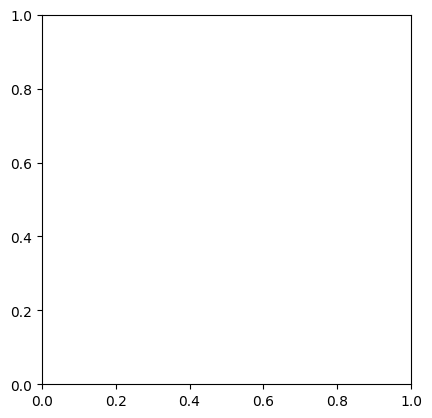

In [4]:
img = cv.imread("images/apple.jpg")   # Read the image
plt.imshow(img)   # Ploting the image using matplotlib

Notice how the apple looks weird?

This is because OpenCV utilize the BGR format as it was the popular format for camera manufacturer back in the day when it was written, and for historical reasons, we have to live with it.

Before we fix this in a second, let us first examine the cv.imread() function.

cv.imread()has two arguments:

1. Image Path
2. The 3 parameters that the image should be read. They can also be alternatively represented as integers:
    - -1 or cv.IMREAD_COLOR (Default Tag) — neglects the image transparency, mostly for 8-bit images that don’t have the alpha channel.
    - 0 or cv.IMREAD_GRAYSCALE — responsible for loading our images in grayscale.
    - 1 or cv.IMREAD_UNCHANGED — loads an image using the alpha channel.

Ok, now that we understand the image reading function, let’s try to fix the weird colors. To do this, we are going to Convert it to RGB format using the cvtColor() function in OpenCV, using the cv.COLOR_BGR2RGB as the parameter.

In [2]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

NameError: name 'img' is not defined

Boom!

There we go! We just successfully displayed our first image.

Alternatively, you can also displayed the Image using the below method:

In [6]:
cv.imshow("image",img_rgb)
key = cv.waitKey(0) 
if key == 27:
    cv.destroyAllWindows()

The result will open up a new window

Note that cv.waitKey() is a keyboard binding function that waits for specified millisecond for any keyboard event, where we put 0 , and therefore it would trigger the event right away.

Here we also see if key == 27 . In this case, 27 is the binary number for the key ESC . Therefore cv.destroyAllWindows() will activate, which closes all current OpenCV windows, will only activate if the user press the ESC key.

## Examine The Image

In [7]:
print("Image type: ", type(img_rgb))
print("Image data type: ", img_rgb.dtype)
print("Image shape: ", img_rgb.shape)

Image type:  <class 'numpy.ndarray'>
Image data type:  uint8
Image shape:  (240, 210, 3)


As we can see the image is a numpy n-th dimensional array with its shape in this case being (240,210,3).

This is because computers read images in term of pixels. Note that OpenCV stores the y pixels as rows, and x pixels as columns.

So in this case image, this is a 240 x 210 picture. The 3 represent the BGR or RGB value inside of each pixel, expressed in form of an array.

With a dtype of uint8(8-bit unsigned integer arrays, the max value is 255, and the min value is 0.

In image processing, bicubic interpolation is often chosen over bilinear or nearest-neighbor interpolation in image resampling, when speed is not an issue.

## Drawing Shapes

### Lines

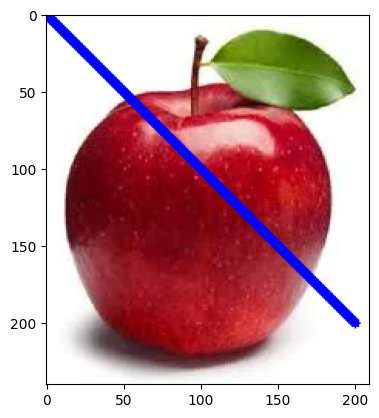

In [8]:
line_img = img_rgb.copy()        # Make a copy of the image
cv.line(line_img,(0,0),(200,200),(0,0,255),5)   # Draw the line
plt.imshow(line_img)    # show the image

There are 4 arguments in this tutorial for the cv.line() function that you have to worry about, which will mutate the image variable.

For more parameters, feel free to refer to the drawing documentation
https://docs.opencv.org/3.4.1/d6/d6e/group__imgproc__draw.html

1. img_rgb , which in this case represents the image we would like to draw our line on
2. (0,0), the starting location of our line with both x and y equals 0
3. (200,200), the end location of our line also with both x and y equals 200
4. ((0,255,0),5), the color of our line (0,255,0) and the thickness of the line in 5 px.

### Rectangle

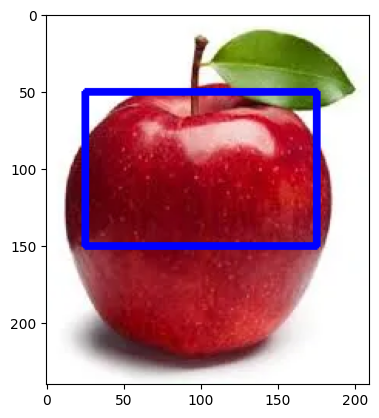

In [10]:
rectangle_img = img_rgb.copy()
cv.rectangle(rectangle_img,(25,50),(175,150),(0,0,255),3)
plt.imshow(rectangle_img)

For the cv.rectangle() method, here are the parameters meant.

1. img_rgb, the image we would like to draw our rectangle on
2. (25,50), pt1, vertex of the rectangle
3. (175,150), pt2, vertext of the rectangle of the pt1
4. (0,0,255), the RGB value of our rectangle color
5. 3 , the thickness of our rectangle in pixels

### Circle

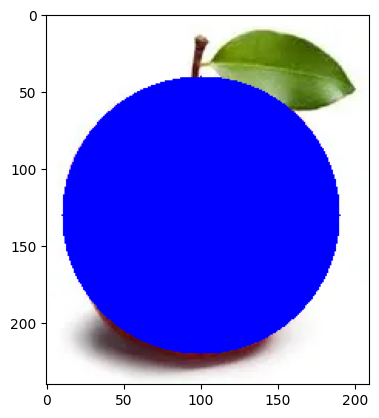

In [11]:
circle_img = img_rgb.copy() 
cv.circle(circle_img,(100,130), 90, (0,0,255), -1)
plt.imshow(circle_img)  

Parameters Explained:

1. img_rgb, the image we would like to draw our rectangle on
2. (100,130), center location of where the circle starts
3. 90, the radius of the circle in pixels
4. (0,0,255), the RGB value of our rectangle color, in this case it is blue
5. -1 thickness of our circle, if NEGATIVE, then the circle is going to be filled

### Ellipse

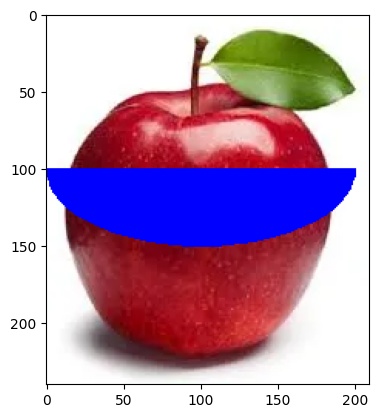

In [12]:
ellipse_img = img_rgb.copy()    
cv.ellipse(ellipse_img,(100,100),(100,50),0,0,180,(0,0,255),-1)
plt.imshow(ellipse_img)

1. img_rgb, the image we would like to draw our ellipse on
2. (100,100), center of our Ellipse
3. (100,50), axes lengths (major axis length, minor axis length)
4. 0,0,180 , represents the ellipse rotation angle 0 , start angle 0, and end angel 180
5. (0,0,255) represents the color of our ellipse, which is blue in this case
6. -1 the thickness of our rectangle in pixels, again, -1 meant that the ellipse will be filled instead of displaying a silhouette with x amount of pixels

### Putting Text on Image

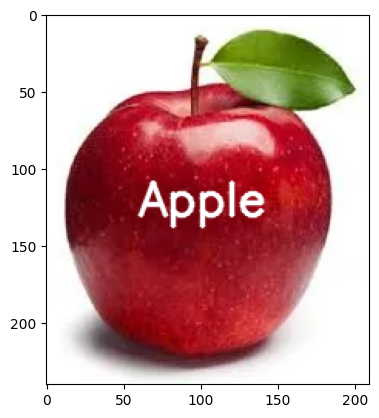

In [14]:
text_img = img_rgb.copy()                
font = cv.FONT_HERSHEY_SIMPLEX 
textcolor = (255,255,255)
cv.putText(text_img,'Apple',(60,130),font, 1,textcolor,2,cv.LINE_AA)             
plt.imshow(text_img) 

Here are the parameters for the cv.putText() function:

1. text_img, the image where we are going to do our image manipulation on
2. 'Apple', the text string that you would like to put onto the image
3. (60,130), the bottom-left corner of the text
4. font, in this case, we set it as FONT_HERSHEY_SIMPLEX, to see more font options, check out https://docs.opencv.org/3.4.1/d0/de1/group__core.html#ga0f9314ea6e35f99bb23f29567fc16e11
5. 1, the numerical font scale
6. textcolor, the color of the text in rgb value, which in this case is (255,255,255) , the white font
7. 2, the thickness of the text in terms of pixels
8. cv.LINE_AA, line types, check it out here https://docs.opencv.org/3.4.1/d0/de1/group__core.html#gaf076ef45de481ac96e0ab3dc2c29a777

### Save the Image

In [15]:
cv.imwrite("images/Apple_with_Text.jpg",text_img)

True

Finally, to save the image, utilize the command cv.imwrite() , the first parameter represents the file path and filename, and the second parameter represents the image variable that you would like to save.